In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])
    
    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    
    return lower_adjacent_value, upper_adjacent_value

In [3]:
def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction="out")
    ax.xaxis.set_ticks_position("bottom")
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel("sample name")

In [4]:
np.random.seed(19347901)

data = [sorted(np.random.normal(0, std, 100)) for std in range(1, 5)]
quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3) for sorted_array, q1, q3 in zip(data, quartile1, quartile3)
])
whisker_min, whisker_max = whiskers[:, 0], whiskers[:, 1]
inds = np.arange(1, len(medians) + 1)
labels = ["A", "B", "C", "D"]

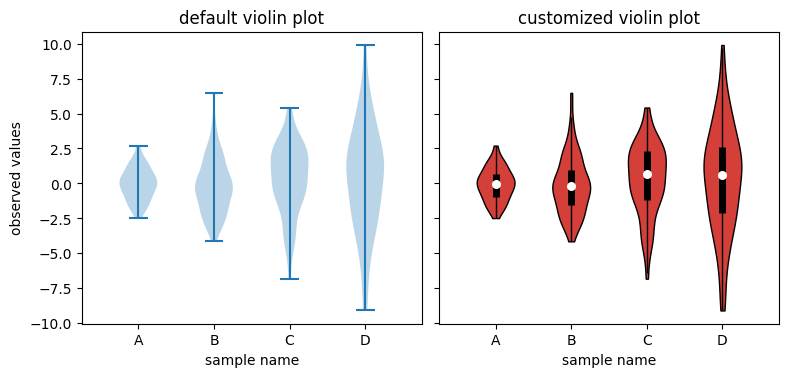

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=True)

ax1.set_title("default violin plot")
ax1.set_ylabel("observed values")
ax1.violinplot(data)

ax2.set_title("customized violin plot")
parts = ax2.violinplot(data, showmeans=False, showmedians=False, showextrema=False)

for pc in parts["bodies"]:
    pc.set_facecolor("#D43F3A")
    pc.set_edgecolor("black")
    pc.set_alpha(1)

ax2.scatter(inds, medians, marker="o", color="white", s=30, zorder=3)
ax2.vlines(inds, quartile1, quartile3, color="k", linestyle="-", lw=5)
ax2.vlines(inds, whisker_min, whisker_max, color="k", linestyle="-", lw=1)

for ax in [ax1, ax2]:
    set_axis_style(ax, labels)

fig.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()